In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn 
import os
import sys
import time

from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [2]:
print(tf.__version__)

2.0.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

In [4]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)



In [ ]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap='binary')
    plt.show()

show_single_image(x_train[0])

In [ ]:
def show_imgs(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)
    
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols*row +col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap='binary',interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_name = ['T-shirt','Trouser','p','d','c','s','shirt','sneaker','b','a']


In [ ]:
show_imgs(3,5,x_train,y_train,class_name)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation='selu'))
  #  model.add(keras.layers.BatchNormalization())
    
# model.add(keras.layers.Dense(300,activation = 'relu'))
# model.add(keras.layers.Dense(100,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))



model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'sgd', metrics = ['accuracy'])


In [ ]:
model.layers

In [ ]:
model.summary()

In [6]:
logdir = './dnn_selu_callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_minist_model.h5")

callbacks =[
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]
history = model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid),callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 224us/sample - loss: 0.5591 - accuracy: 0.7968 - val_loss: 0.4428 - val_accuracy: 0.8418
Epoch 2/10
55000/55000 [==============================] - 10s 183us/sample - loss: 0.4104 - accuracy: 0.8485 - val_loss: 0.4436 - val_accuracy: 0.8408
Epoch 3/10
55000/55000 [==============================] - 9s 170us/sample - loss: 0.3683 - accuracy: 0.8633 - val_loss: 0.3632 - val_accuracy: 0.8692
Epoch 4/10
55000/55000 [==============================] - 9s 171us/sample - loss: 0.3416 - accuracy: 0.8734 - val_loss: 0.3567 - val_accuracy: 0.8684
Epoch 5/10
55000/55000 [==============================] - 9s 172us/sample - loss: 0.3195 - accuracy: 0.8821 - val_loss: 0.3415 - val_accuracy: 0.8790
Epoch 6/10
55000/55000 [==============================] - 10s 177us/sample - loss: 0.3031 - accuracy: 0.8870 - val_loss: 0.3494 - val_accuracy: 0.8740
Epoch 7/10
55000/55000 [========================

In [ ]:
type(history)

In [ ]:
history.history

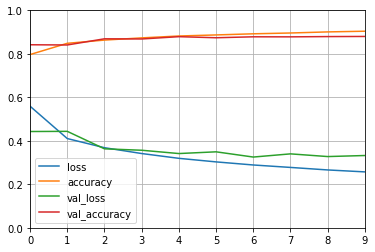

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot()
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [ ]:
model.evaluate(x_test_scaled,y_test)